# PROJECT 1: RICE LEAF DISEASE PREDICTION

Group ID :PTID-CDS-DEC-23-1734
Project ID :PRCP- 1001- RiceLeaf disease detection

# Introduction:

Rice leaf, a vital component of the rice plant (Oryza sativa), is a crucial element in the world's agricultural landscape. These leaves play a significant role in the growth and development of the rice plant, which is a staple food for a large portion of the global population. Rice leaves are characterized by their long, slender shape and green color, and they are responsible for photosynthesis, a fundamental process that converts sunlight into energy and sustains the plant's growth. Additionally, rice leaves also serve as a key indicator of the plant's health and can provide valuable insights into its overall condition. The understanding of rice leaves are essential for maximizing rice production and ensuring food security for millions of people world-wide.

Rice plant is susceptible to diseases that may affect the quantity and quality of rice production. Detection of these diseases by the farmers will require a great knowledge about the various disease and how to identify them visually. Monitoring these diseases, their occurrences and frequencies are very important for early detection of the affected plants, their timely treatment, and most importantly, for planning future strategies to prevent the diseases to minimize the losses. CNN is an algorithm of deep learning techniques that has been successfully invoked for handling computer vision issues such as picture classification, object segmentation, and image analysis. CNN has been used to address the classification of Rice leaf diseases accurate detection and classification of rice leaf disease. The dataset provided contains 119 jpg images of disease-infected rice leaves. The images are grouped into 3 classes in 40:40:39 ratio based on the type of disease.

Bacterial blight: elongated lesions near the leaf tips and margins, and turns white to yellow and then grey due to fungal attack.

Brown spot: dark brown colored and round to oval shaped lesions on rice leaves.

Leaf smut: small black linear lesions on leaf blades, leaf tips may turn grey and dry.


# Problem Description:
The task involves classifying leaf images into one of three classes:
1) Bacterial leaf blight,
2) Brown spot,
3) Leaf smut.

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random
import os
import warnings
warnings.filterwarnings('ignore')


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Lambda,Input
from keras.layers import Dense,Flatten,Dropout,Conv2D,Convolution2D,MaxPool2D,MaxPooling2D,BatchNormalization
from keras.models import Model
from keras.models import Sequential
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from glob import glob

# Dataset Overview:
Training Dataset: The training dataset consists of images belonging to three classes: Bacterial leaf blight, Brown spot, and Leaf smut. The dataset is well-organized into separate folders for each class.


Test Dataset: A separate test dataset is available for evaluating the model's performance.

In [ ]:
# Set the Dataset paths
train_path = r'D:\Capstone Project\Data\Train (Leaf)'
test_path = r'D:\Capstone Project\Data\Test (Leaf)'

In [ ]:
# Get the number of classes in the training and test datasets
train_folders = glob('D:\Capstone Project\Data\Train (Leaf)\*')
print("Number of classes in the training dataset:", len(train_folders))

Number of classes in the training dataset: 3


In [ ]:
test_folders = glob('D:\Capstone Project\Data\Test (Leaf)\*')
print("Number of classes in the test dataset:", len(test_folders))

Number of classes in the test dataset: 3


# Exploratory Data Analysis:
Visualizations were performed to gain insights into the dataset. Random images from each class were displayed to get an understanding of the leaf types.


Class Distribution:

Bacterial leaf blight class: Images from this class were visualized, showing random samples.

Brown spot class: Similar visualization was performed for the Brown spot class.

Leaf smut class: Random images from the Leaf smut class were also displayed.

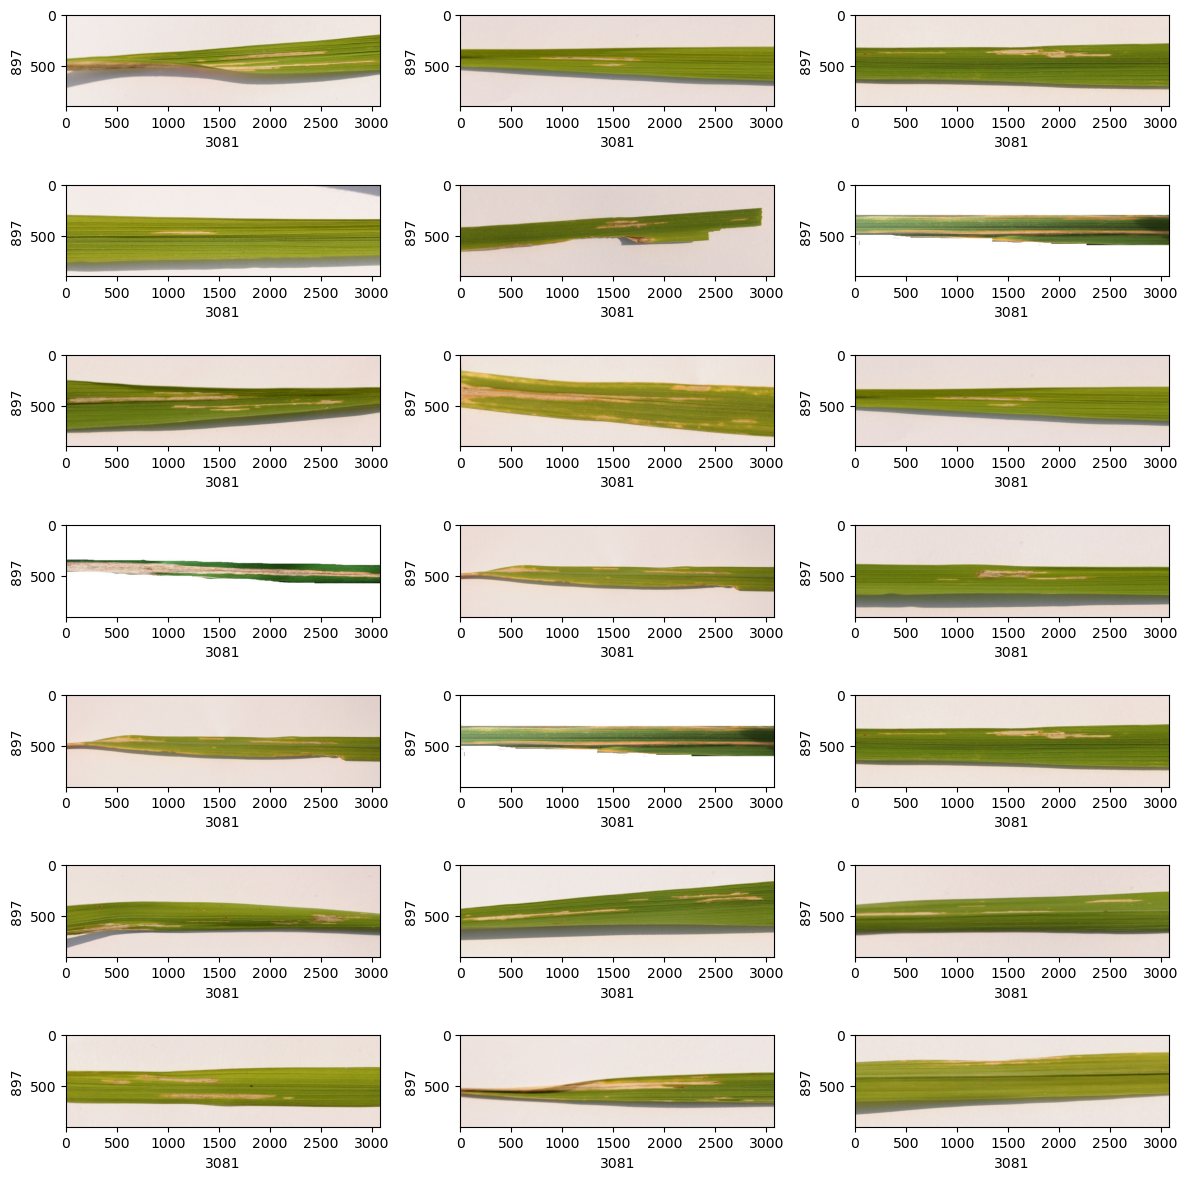

In [ ]:
# Visualize random images from the Bacterial leaf blight class
plt.figure(figsize=(12, 12))
bacteria_path = r"D:\Capstone Project\Data\Data\Bacterial leaf blight"
for i in range(1, 22):
    plt.subplot(7, 3, i)
    plt.tight_layout()
    rand_img = plt.imread(bacteria_path + '/' + random.choice(sorted(os.listdir(bacteria_path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize=10)  # Width of image
    plt.ylabel(rand_img.shape[0], fontsize=10)  # Height of image

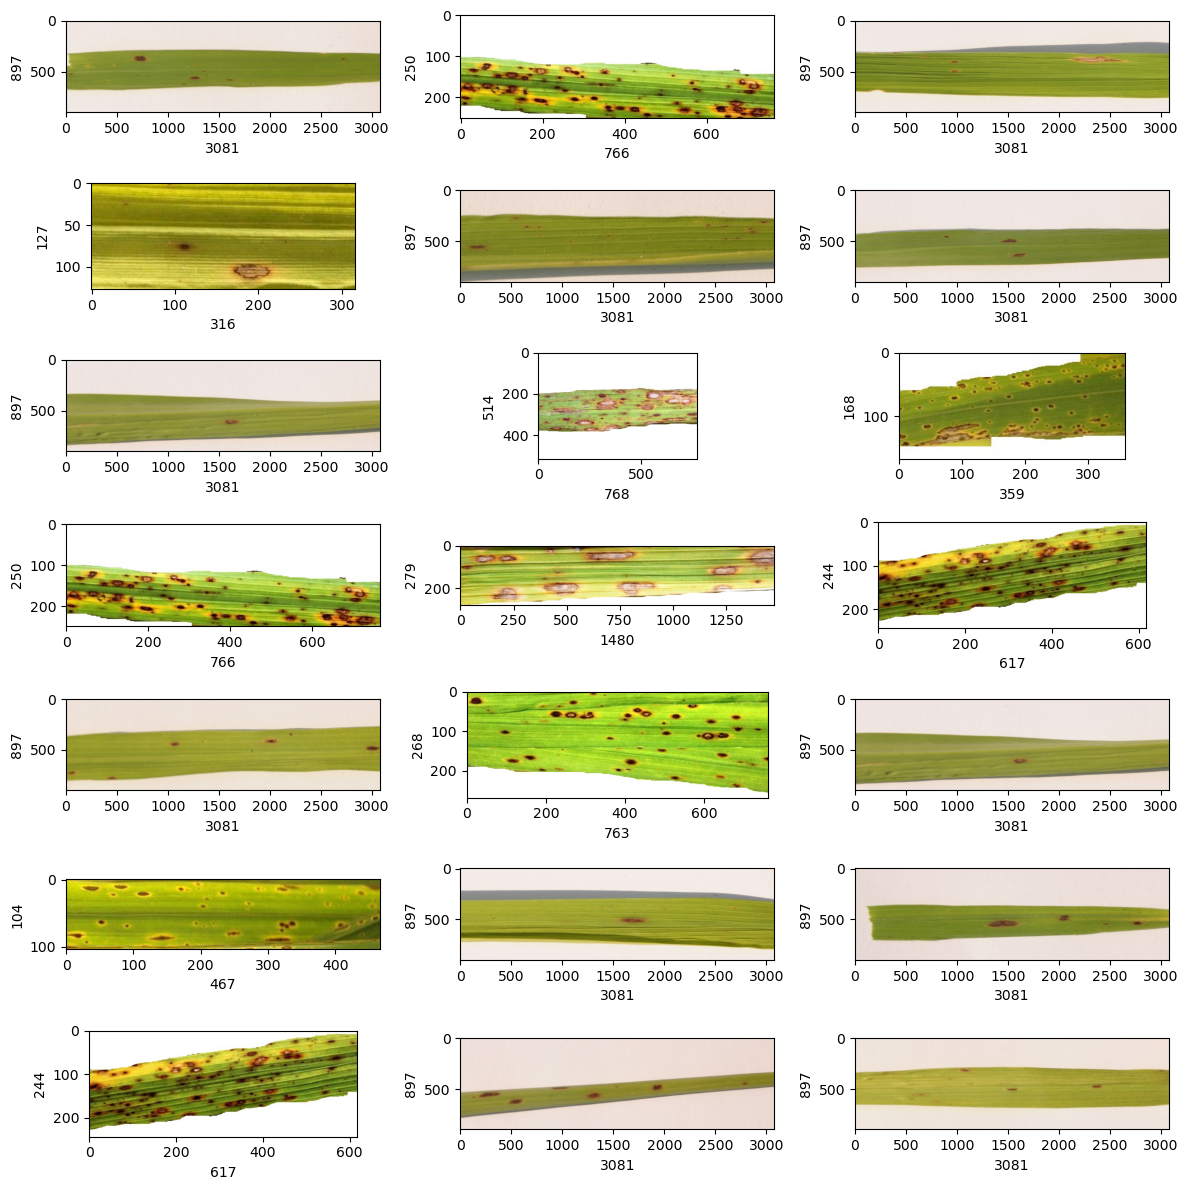

In [ ]:
# Visualize random images from the Brown spot class
plt.figure(figsize=(12, 12))
brown_path = r"D:\Capstone Project\Data\Data\Brown spot"
for i in range(1, 22):
    plt.subplot(7, 3, i)
    plt.tight_layout()
    rand_img = plt.imread(brown_path + '/' + random.choice(sorted(os.listdir(brown_path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize=10)  # Width of image
    plt.ylabel(rand_img.shape[0], fontsize=10)  # Height of image

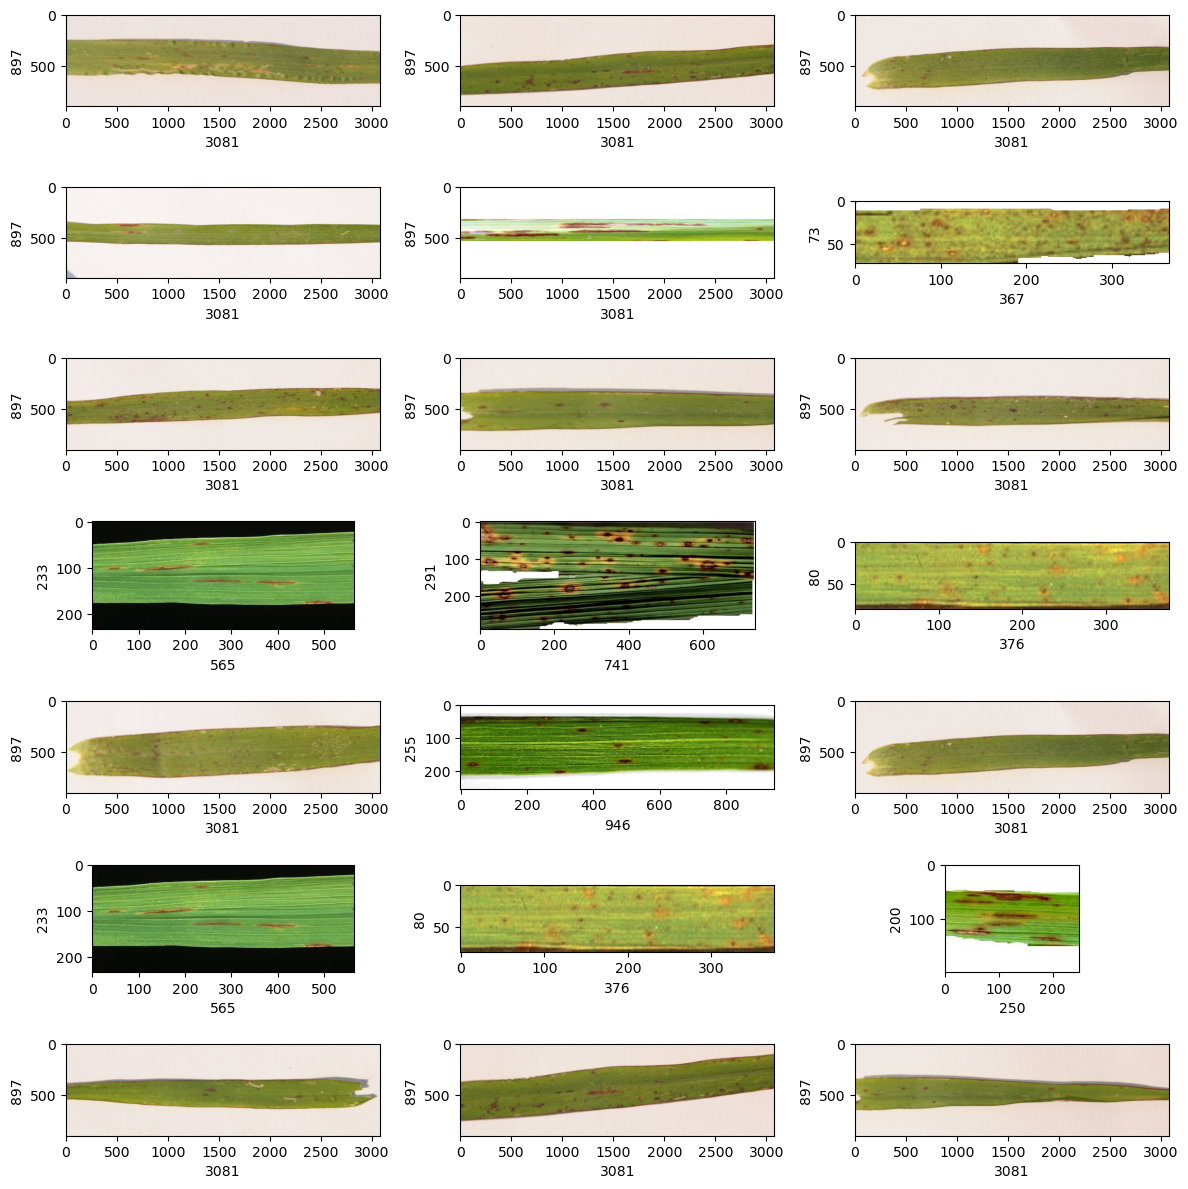

In [ ]:
# Visualize random images from the Leaf smut class
plt.figure(figsize=(12, 12))
leaf_smut_path = r"D:\Capstone Project\Data\Data\Leaf smut"
for i in range(1, 22):
    plt.subplot(7, 3, i)
    plt.tight_layout()
    rand_img = plt.imread(leaf_smut_path + '/' + random.choice(sorted(os.listdir(leaf_smut_path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize=10)  # Width of image
    plt.ylabel(rand_img.shape[0], fontsize=10)  # Height of image

# Data Preprocessing:


ImageDataGenerator was used for data augmentation during training.


The dataset was split into training and validation sets using a split ratio of 75% for training and 25% for validation.

In [ ]:
train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest',
                                   validation_split = .25)
test_datagen = ImageDataGenerator(rescale=1./255,
                                  validation_split = .25)

In [ ]:
# Creating data generators for training and validation sets
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size=(256, 256),
                                                 batch_size=5,
                                                 class_mode='categorical',
                                                 subset='training')


Found 90 images belonging to 3 classes.


In [ ]:
validation_set = train_datagen.flow_from_directory(train_path,
                                                   target_size=(256, 256),
                                                   batch_size=5,
                                                   class_mode='categorical',
                                                   subset='validation')


Found 29 images belonging to 3 classes.


# Model Architecture:
    
Four Convolutional Neural Network (CNN) models were trained using different optimizers:

1) Adam Optimizer Model

2) Stochastic Gradient Descent (SGD) Optimizer Model

3) Adagrad Optimizer Model

4) RMSprop Optimizer Model

Each model follows a similar architecture with convolutional layers, max-pooling layers, and dense layers.

The output layer uses softmax activation for multi-class classification.

In [ ]:
# Build CNN model using Adam optimizer
model_adam = Sequential()
model_adam.add(Conv2D(filters=16, kernel_size=2, activation='relu', input_shape=[256, 256, 3]))
model_adam.add(MaxPooling2D(pool_size=2))
model_adam.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model_adam.add(MaxPooling2D(pool_size=2))
model_adam.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model_adam.add(MaxPooling2D(pool_size=2))
model_adam.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model_adam.add(MaxPooling2D(pool_size=2))
model_adam.add(Flatten())
model_adam.add(Dense(128, activation="relu"))
model_adam.add(Dropout(0.5))
model_adam.add(Dense(3, activation="softmax"))

In [ ]:
## Layers
model_adam.layers

In [ ]:
## Summary
model_adam.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 255, 255, 16)      208       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 126, 126, 32)      2080      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 62, 62, 32)        4128      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 31, 31, 32)       

In [ ]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
early_stopping

# Adam

In [ ]:
from keras.optimizers import Adam

In [ ]:
model_adam.compile(loss = 'categorical_crossentropy',  optimizer = 'adam', metrics=['accuracy'])

# Model Training:
    
Each model was trained for 150 epochs.


Early stopping was applied to prevent overfitting, monitoring the validation loss with a patience of 20 epochs.

In [ ]:
# Training the model
history_adam = model_adam.fit_generator(training_set,
                    steps_per_epoch=len(training_set),
                    epochs=150,
                    validation_data=validation_set,
                    validation_steps = len(validation_set))

Epoch 1/150
18/18 [==============================] - 7s 419ms/step - loss: 0.4589 - accuracy: 0.7889 - val_loss: 3.3006 - val_accuracy: 0.5172
Epoch 2/150
18/18 [==============================] - 9s 484ms/step - loss: 0.4269 - accuracy: 0.7889 - val_loss: 1.1078 - val_accuracy: 0.7586
Epoch 3/150
18/18 [==============================] - 8s 450ms/step - loss: 0.4578 - accuracy: 0.8000 - val_loss: 1.6048 - val_accuracy: 0.6897
Epoch 4/150
18/18 [==============================] - 8s 418ms/step - loss: 0.4231 - accuracy: 0.8000 - val_loss: 2.5992 - val_accuracy: 0.5517
Epoch 5/150
18/18 [==============================] - 8s 429ms/step - loss: 0.3470 - accuracy: 0.8333 - val_loss: 1.7338 - val_accuracy: 0.7931
Epoch 6/150
18/18 [==============================] - 8s 446ms/step - loss: 0.4729 - accuracy: 0.8333 - val_loss: 0.4715 - val_accuracy: 0.7931
Epoch 7/150
18/18 [==============================] - 8s 448ms/step - loss: 0.3937 - accuracy: 0.8444 - val_loss: 1.0089 - val_accuracy: 0.7241

In [ ]:
score_adam = model_adam.evaluate(validation_set, verbose=0)
accuracy_adam = 100 * score_adam[1]
print('Accuracy CNN Model with Adam Optimizer:', accuracy_adam)


Accuracy CNN Model with Adam Optimizer: 86.20689511299133


Text(0.5, 1.0, 'Model Loss')

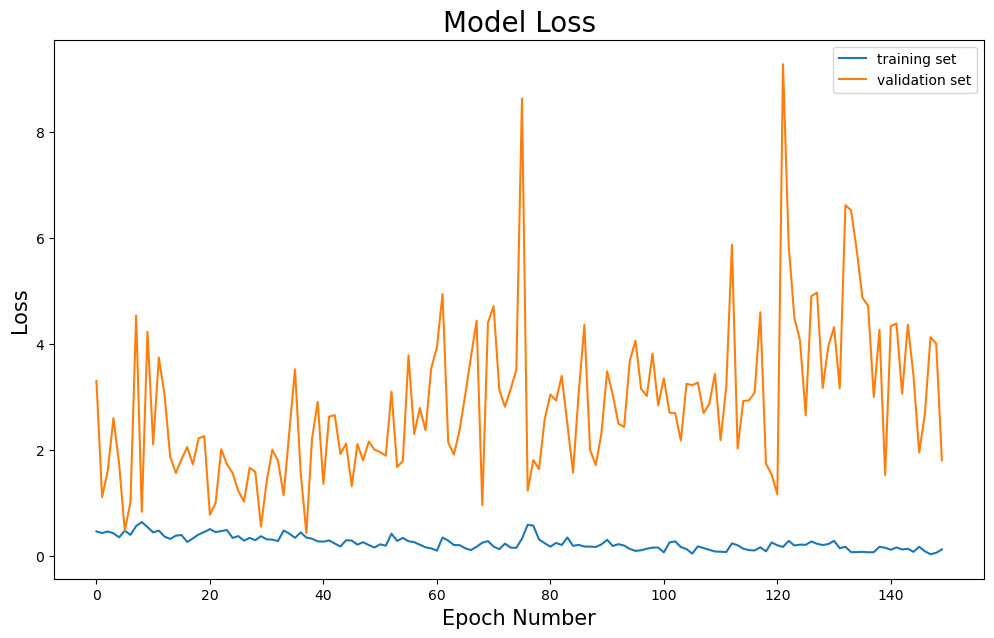

In [ ]:
plt.figure(figsize=(12, 7))
plt.xlabel('Epoch Number', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.plot(history_adam.history['loss'], label='training set')
plt.plot(history_adam.history['val_loss'], label='validation set')
plt.legend()
plt.title("Model Loss", fontsize=20)


Text(0.5, 1.0, 'Model Accuracy')

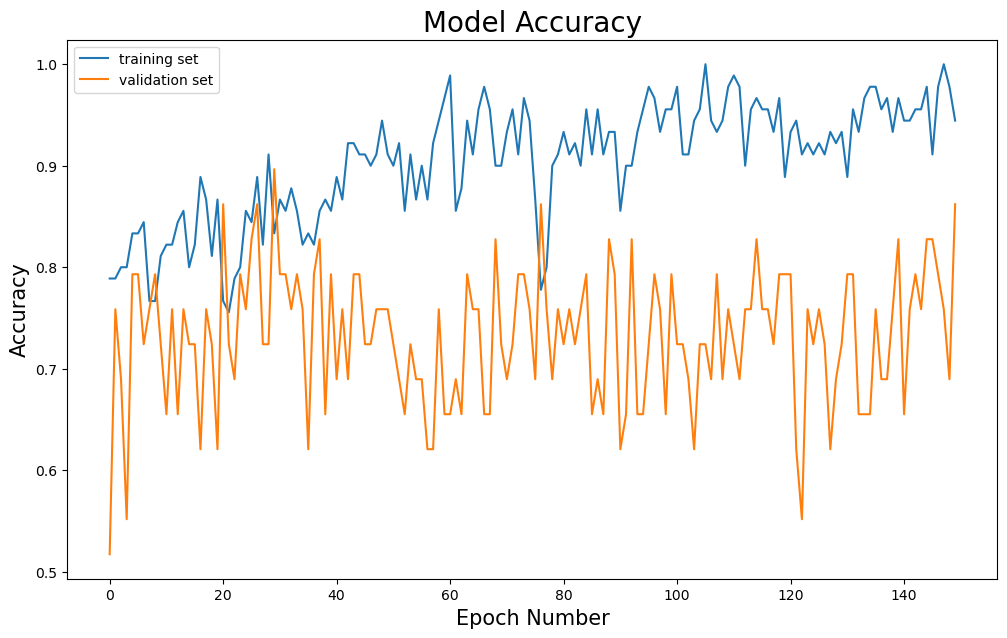

In [ ]:
plt.figure(figsize=(12,7))
plt.xlabel('Epoch Number',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.plot(history_adam.history['accuracy'], label = 'training set')
plt.plot(history_adam.history['val_accuracy'], label = 'validation set')
plt.legend()
plt.title("Model Accuracy",fontsize=20)

# Stochastic Gradient Descent (SGD) Optimizer Model

In [ ]:
model_sgd = Sequential()
model_sgd.add(Conv2D(filters=16, kernel_size=2, activation='relu', input_shape=[256, 256, 3]))
model_sgd.add(MaxPooling2D(pool_size=2))
model_sgd.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model_sgd.add(MaxPooling2D(pool_size=2))
model_sgd.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model_sgd.add(MaxPooling2D(pool_size=2))
model_sgd.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model_sgd.add(MaxPooling2D(pool_size=2))
model_sgd.add(Flatten())
model_sgd.add(Dense(128, activation="relu"))
model_sgd.add(Dense(3, activation="softmax"))

In [ ]:
model_sgd.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 255, 255, 16)      208       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 126, 126, 32)      2080      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 62, 62, 32)        4128      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 31, 31, 32)       

In [ ]:
# Compile the model with SGD optimizer
model_sgd.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


In [ ]:
history_sgd = model_sgd.fit_generator(training_set,
                                      steps_per_epoch=len(training_set),
                                      epochs=150,
                                      validation_data=validation_set,
                                      validation_steps=len(validation_set))



Epoch 1/150
18/18 [==============================] - 7s 396ms/step - loss: 1.0989 - accuracy: 0.3333 - val_loss: 1.0965 - val_accuracy: 0.3448
Epoch 2/150
18/18 [==============================] - 8s 432ms/step - loss: 1.1046 - accuracy: 0.3333 - val_loss: 1.0970 - val_accuracy: 0.3448
Epoch 3/150
18/18 [==============================] - 8s 477ms/step - loss: 1.1120 - accuracy: 0.2444 - val_loss: 1.0957 - val_accuracy: 0.3448
Epoch 4/150
18/18 [==============================] - 10s 538ms/step - loss: 1.1021 - accuracy: 0.3111 - val_loss: 1.0966 - val_accuracy: 0.3448
Epoch 5/150
18/18 [==============================] - 8s 409ms/step - loss: 1.0946 - accuracy: 0.3667 - val_loss: 1.1013 - val_accuracy: 0.2759
Epoch 6/150
18/18 [==============================] - 7s 415ms/step - loss: 1.0997 - accuracy: 0.3556 - val_loss: 1.1024 - val_accuracy: 0.3103
Epoch 7/150
18/18 [==============================] - 7s 397ms/step - loss: 1.0977 - accuracy: 0.3667 - val_loss: 1.0972 - val_accuracy: 0.379

In [ ]:
score_sgd = model_sgd.evaluate(validation_set, verbose=0)
accuracy_sgd = 100 * score_sgd[1]
print('Accuracy CNN Model with SGD Optimizer:', accuracy_sgd)

Accuracy CNN Model with SGD Optimizer: 62.068963050842285


Text(0.5, 1.0, 'Model Loss')

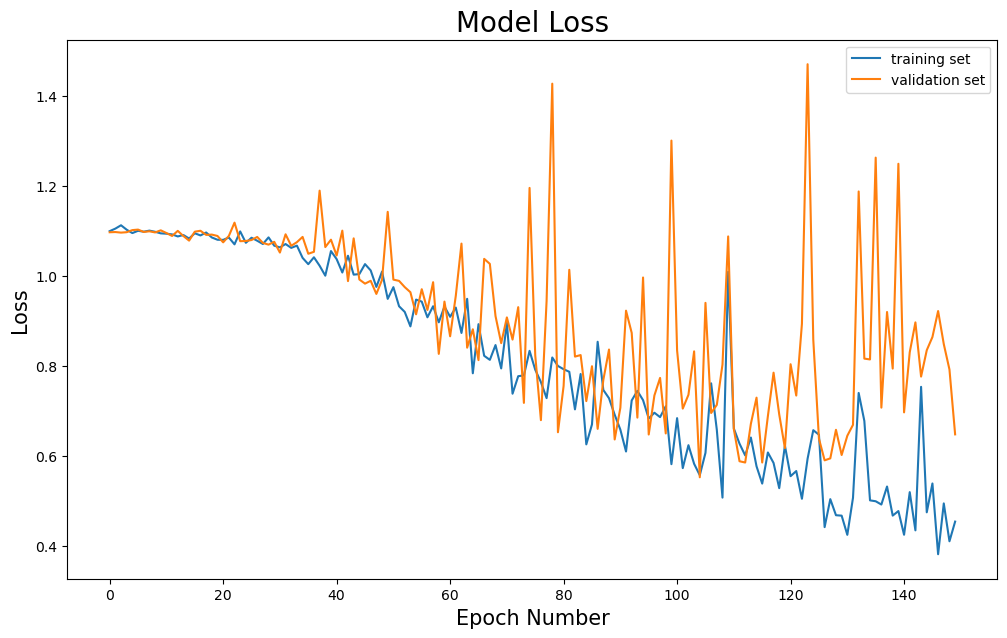

In [ ]:
# Plot the training and validation loss
plt.figure(figsize=(12, 7))
plt.xlabel('Epoch Number', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.plot(history_sgd.history['loss'], label='training set')
plt.plot(history_sgd.history['val_loss'], label='validation set')
plt.legend()
plt.title("Model Loss", fontsize=20)

Text(0.5, 1.0, 'Model Accuracy')

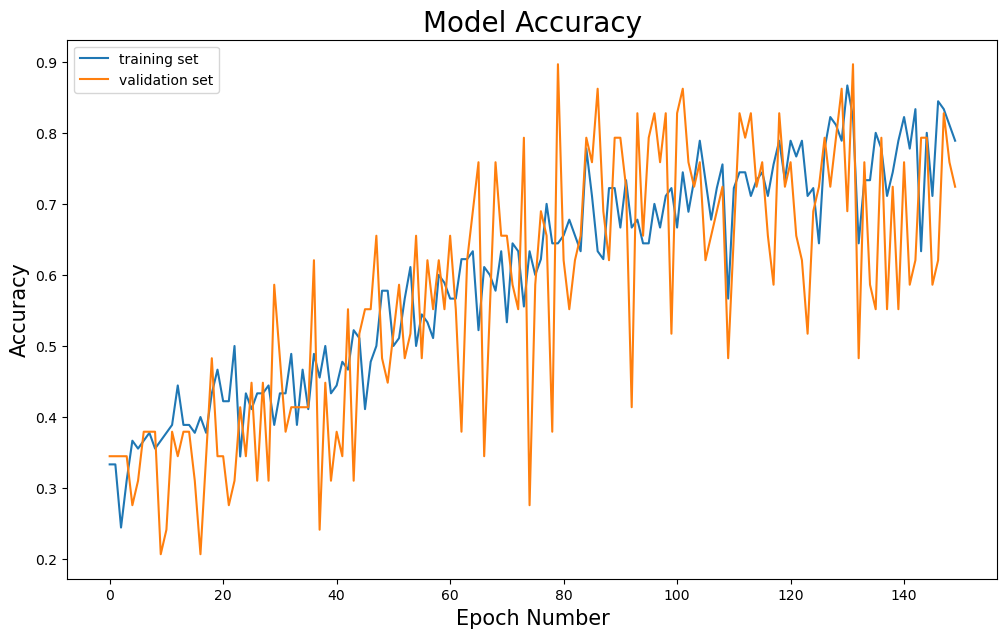

In [ ]:
# Plot the training and validation accuracy
plt.figure(figsize=(12, 7))
plt.xlabel('Epoch Number', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.plot(history_sgd.history['accuracy'], label='training set')
plt.plot(history_sgd.history['val_accuracy'], label='validation set')
plt.legend()
plt.title("Model Accuracy", fontsize=20)

# ADAGRAD

In [ ]:
model_adagrad = Sequential()
model_adagrad.add(Conv2D(filters=16, kernel_size=2, activation='relu', input_shape=[256, 256, 3]))
model_adagrad.add(MaxPooling2D(pool_size=2))
model_adagrad.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model_adagrad.add(MaxPooling2D(pool_size=2))
model_adagrad.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model_adagrad.add(MaxPooling2D(pool_size=2))
model_adagrad.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model_adagrad.add(MaxPooling2D(pool_size=2))
model_adagrad.add(Flatten())
model_adagrad.add(Dense(128, activation="relu"))
model_adagrad.add(Dropout(0.5))
model_adagrad.add(Dense(3, activation="softmax"))

In [ ]:
# Display the summary of the model
model_adagrad.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 255, 255, 16)      208       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 126, 126, 32)      2080      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 62, 62, 32)        4128      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 31, 31, 32)       

In [ ]:
# Compile the model with Adagrad optimizer
model_adagrad.compile(loss='categorical_crossentropy', optimizer='Adagrad', metrics=['accuracy'])


In [ ]:
# Train the model
history_adagrad = model_adagrad.fit_generator(training_set,
                                              steps_per_epoch=len(training_set),
                                              epochs=150,
                                              validation_data=validation_set,
                                              validation_steps=len(validation_set))


Epoch 1/150
18/18 [==============================] - 8s 409ms/step - loss: 1.1091 - accuracy: 0.3000 - val_loss: 1.1061 - val_accuracy: 0.2414
Epoch 2/150
18/18 [==============================] - 8s 423ms/step - loss: 1.1031 - accuracy: 0.3333 - val_loss: 1.0968 - val_accuracy: 0.3448
Epoch 3/150
18/18 [==============================] - 7s 415ms/step - loss: 1.1265 - accuracy: 0.2778 - val_loss: 1.1005 - val_accuracy: 0.3793
Epoch 4/150
18/18 [==============================] - 7s 394ms/step - loss: 1.0993 - accuracy: 0.3111 - val_loss: 1.0962 - val_accuracy: 0.2414
Epoch 5/150
18/18 [==============================] - 8s 431ms/step - loss: 1.1091 - accuracy: 0.3444 - val_loss: 1.0983 - val_accuracy: 0.3103
Epoch 6/150
18/18 [==============================] - 7s 400ms/step - loss: 1.0946 - accuracy: 0.3444 - val_loss: 1.0911 - val_accuracy: 0.5172
Epoch 7/150
18/18 [==============================] - 8s 427ms/step - loss: 1.1075 - accuracy: 0.3333 - val_loss: 1.0966 - val_accuracy: 0.3448

In [ ]:
# Evaluate and print the accuracy
score_adagrad = model_adagrad.evaluate(validation_set, verbose=0)
accuracy_adagrad = 100 * score_adagrad[1]
print('Accuracy CNN Model with Adagrad Optimizer:', accuracy_adagrad)


Accuracy CNN Model with Adagrad Optimizer: 44.82758641242981


Text(0.5, 1.0, 'Model Loss')

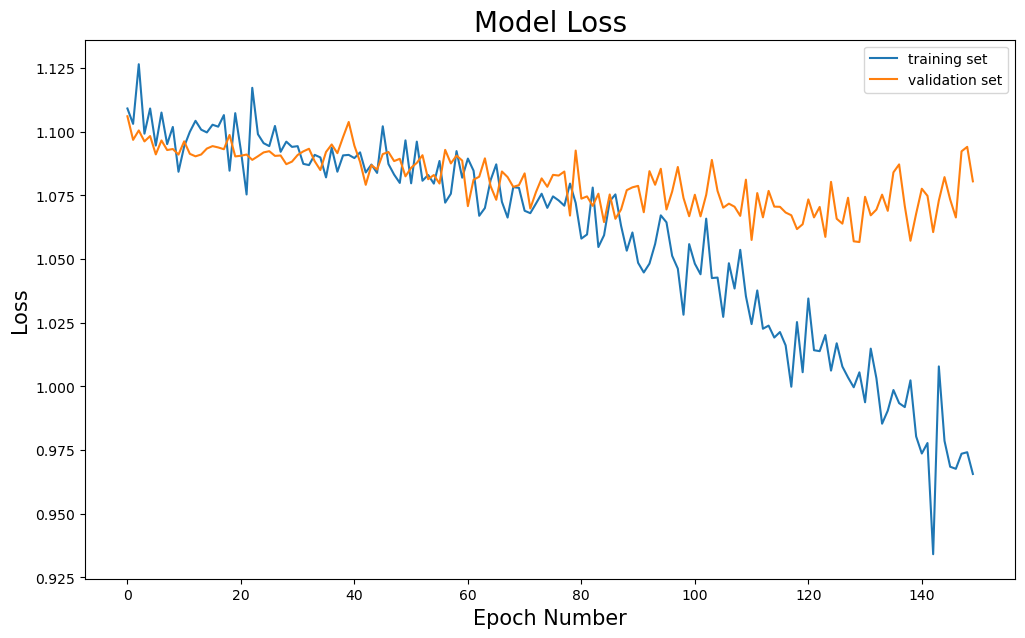

In [ ]:
# Plot the training and validation loss
plt.figure(figsize=(12, 7))
plt.xlabel('Epoch Number', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.plot(history_adagrad.history['loss'], label='training set')
plt.plot(history_adagrad.history['val_loss'], label='validation set')
plt.legend()
plt.title("Model Loss", fontsize=20)


Text(0.5, 1.0, 'Model Accuracy')

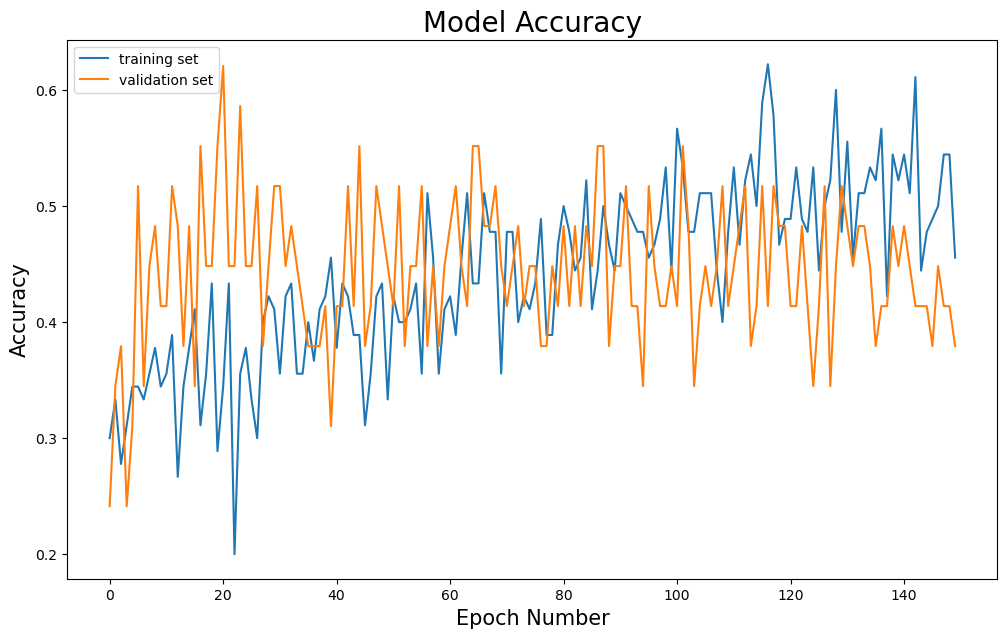

In [ ]:
# Plot the training and validation accuracy
plt.figure(figsize=(12, 7))
plt.xlabel('Epoch Number', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.plot(history_adagrad.history['accuracy'], label='training set')
plt.plot(history_adagrad.history['val_accuracy'], label='validation set')
plt.legend()
plt.title("Model Accuracy", fontsize=20)


In [ ]:
# Build CNN model using RMSprop optimizer
model_rms = Sequential()
model_rms.add(Conv2D(filters=16, kernel_size=2, activation='relu', input_shape=[256, 256, 3]))
model_rms.add(MaxPooling2D(pool_size=2))
model_rms.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model_rms.add(MaxPooling2D(pool_size=2))
model_rms.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model_rms.add(MaxPooling2D(pool_size=2))
model_rms.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model_rms.add(MaxPooling2D(pool_size=2))
model_rms.add(Flatten())
model_rms.add(Dense(128, activation="relu"))
model_rms.add(Dropout(0.5))
model_rms.add(Dense(3, activation="softmax"))


In [ ]:
## Layers
model_rms.layers

In [ ]:
model_rms.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 255, 255, 16)      208       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 126, 126, 32)      2080      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 62, 62, 32)        4128      
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 31, 31, 32)       

# RMSprop

In [ ]:
from keras.optimizers import RMSprop
model_rms.compile(loss = 'categorical_crossentropy',  optimizer = 'RMSprop', metrics=['accuracy'])

In [ ]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
early_stopping

In [ ]:
# Training the model
history_rms = model_rms.fit_generator(training_set,steps_per_epoch=len(training_set),epochs=150,validation_data=validation_set,validation_steps = len(validation_set))

Epoch 1/150
18/18 [==============================] - 9s 431ms/step - loss: 1.1192 - accuracy: 0.3111 - val_loss: 1.0972 - val_accuracy: 0.4828
Epoch 2/150
18/18 [==============================] - 7s 418ms/step - loss: 1.1044 - accuracy: 0.3222 - val_loss: 1.1000 - val_accuracy: 0.4483
Epoch 3/150
18/18 [==============================] - 8s 424ms/step - loss: 1.1109 - accuracy: 0.3333 - val_loss: 1.1028 - val_accuracy: 0.3448
Epoch 4/150
18/18 [==============================] - 8s 434ms/step - loss: 1.0950 - accuracy: 0.3778 - val_loss: 1.0719 - val_accuracy: 0.3448
Epoch 5/150
18/18 [==============================] - 7s 417ms/step - loss: 1.0611 - accuracy: 0.3778 - val_loss: 1.0824 - val_accuracy: 0.3103
Epoch 6/150
18/18 [==============================] - 7s 409ms/step - loss: 1.0351 - accuracy: 0.3556 - val_loss: 1.0662 - val_accuracy: 0.2759
Epoch 7/150
18/18 [==============================] - 8s 422ms/step - loss: 1.0114 - accuracy: 0.4111 - val_loss: 1.4085 - val_accuracy: 0.4138

In [ ]:
score_rms = model_rms.evaluate(validation_set,verbose=0)
accuracy_rms = 100*score_rms[1]
print('Accuracy CNN Model with RMSprop Optimizer:',accuracy_rms)

Accuracy CNN Model with RMSprop Optimizer: 72.41379022598267


# Model Evaluation:
    
    
1) Adam Optimizer Model:

Accuracy: 86.21%
    
Loss: Displayed a decreasing trend over epochs, with slight fluctuations in validation loss.
    

    
2) SGD Optimizer Model:

Accuracy: 62.07%

Loss: The model showed less accuracy compared to others, and the loss exhibited fluctuations.

    
3) Adagrad Optimizer Model:


Accuracy: 44.83%

Loss: Achieved lower accuracy compared to other models. The loss curves showed fluctuating trends.

    
4) RMSprop Optimizer Model:


Accuracy: 72.41%

Loss: Displayed a decreasing trend over epochs, with minor fluctuations in validation loss.

# Model Comparison:

1) Adam optimizer achieved the highest accuracy, followed by RMSprop.

2) Adagrad optimizer resulted in the lowest accuracy among the models.

3) Visualized using a bar plot for easy comparison.

In [ ]:
# Compare accuracies across different optimizers
accuracy = [accuracy_adam, accuracy_rms, accuracy_sgd, accuracy_adagrad]
optimizers = ["ADAM", "ADAGRAD", "SGD", "RMSprop"]


In [ ]:
# Display the accuracies using different optimizers
for i in range(len(optimizers)):
    print("Accuracy achieved using " + optimizers[i] + ": " + str(accuracy[i]) + " %")


Accuracy achieved using ADAM: 86.20689511299133 %
Accuracy achieved using ADAGRAD: 72.41379022598267 %
Accuracy achieved using SGD: 62.068963050842285 %
Accuracy achieved using RMSprop: 44.82758641242981 %


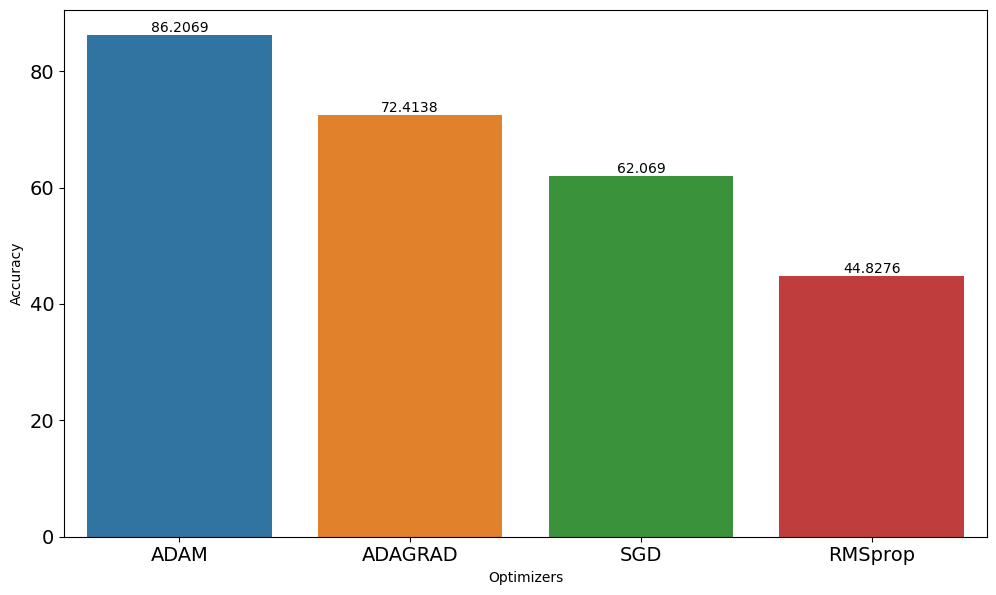

In [ ]:
# Visualize the accuracies using a bar plot
import seaborn as sns
plt.figure(figsize=(10, 6))
plt.xlabel("Optimizers")
plt.ylabel("Accuracy")
ax = sns.barplot(x=optimizers, y=accuracy)
for label in ax.containers:
    ax.bar_label(label)
plt.tight_layout()
plt.tick_params(labelsize=14)

# Conclusion:

- The CNN models were successfully trained and evaluated on the leaf classification task.

- The Adam optimizer model demonstrated the best performance.

- Continuous improvement and experimentation are recommended to optimize the model further.

- In conclusion, the developed CNN model demonstrated strong performance in classifying plant diseases

# Challenges Faced:

- The dataset is limited, train and testing is limited aswell.

- Limited knowledge on Deep learning algorithms to implement on Image processing.

- image shape, array and convertion error was hard to understand, and it took a certain amount of time to
  understand the code and implement the data.
    
- when compiling the model, when we use the call backs the model accuracy decreases.
